# Statystyczna analiza danych

In [1]:
# @title
from IPython.display import display, HTML

pretty_header = """
<div style="
    margin-top: 40px;
    padding: 20px 10px;
    text-align: center;
    font-family: 'Segoe UI', sans-serif;
    color: #2c3e50;
">

    <h1 style="
        font-size: 28px;
        margin-bottom: 10px;
        background: linear-gradient(90deg, #1d70b8, #00a8e8);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        font-weight: 700;
    ">
        Statystyczna Analiza Danych
    </h1>

    <h2 style="
        font-size: 20px;
        font-weight: 400;
        margin-top: 0;
        color: #555;
    ">
        Kierunek: Sztuczna Inteligencja i Automatyzacja Procesów Biznesowych w ujęciu technicznym
    </h2>

    <p style="
        font-size: 16px;
        margin-top: 15px;
    ">
        Projekt słuchaczy studiów podyplomowych
    </p>

    <p style="
        font-size: 16px;
        font-style: italic;
        margin-bottom: 0;
    ">
        Autorzy (kolejność alfabetyczna):
    </p>
    <p style="font-size: 16px; font-weight: 500;">
        Kinga Kaza, Krzysztof Lachs, Joanna Mackiewicz
    </p>
</div>
"""

display(HTML(pretty_header))


## Wprowadzenie

Tematem projektu jest analiza zbioru danych dotyczących szczęścia na świecie. Wykorzystamy w tym celu  raport World Happiness Report, który jest dostępny na platformie Kaggle.
Zbiór danych zawiera informacje o poziomie szczęścia w różnych krajach na świecie, a także różne czynniki wpływające na to szczęście, takie jak PKB na mieszkańca, wsparcie społeczne,
oczekiwana długość życia w zdrowiu, poczucie wolności w podejmowaniu życiowych decyzji, hojność oraz postrzeganie korupcji.
World Hapoiness Report (Raport Światowego Szczęścia) to globalne badanie opinii na temat poziomu zadowolenia z życia na świecie.
Wyniki raportu opierają się na danych pochodzących z Gallup World Poll. Głównym źródłem jest odpowiedź na tzw. "drabinę Cantrila", w której respondenci proszeni są o ocenę swojego życia w skali od 0 do 10, gdzie 10 oznacza najlepsze możliwe życie, a 0 – najgorsze.
Wartości te porównywane są do fikcyjnego kraju o nazwie Dystopia, który stanowi punkt odniesienia z najniższymi wynikami we wszystkich tych kategoriach (czynniki te nie wpływają bezpośrednio na końcową ocenę kraju).

Korzystając z tego zbioru danych, przeprowadzimy analizę statystyczną i wizualizację danych, aby lepiej zrozumieć, jakie czynniki wpływają na poziom szczęścia w różnych krajach.
Rozpatrzymy również te dane w kontekście różnych regionów świata, sytuacji politycznej i gospodarczej, a także innych czynników społecznych i kulturowych panujących w danym kraju
w analizowanym okresie czasu.
Na koniec spróbujemy znaleźć odpowiedź na pyatnie w jaki sposób pandemia COVID-19 wpłynęła na poziom szczęścia w różnych krajach i regionach świata.


Najpierw zainstalujemy bibliotekę kagglehub, która umożliwia pobieranie zbiorów danych z platformy Kaggle oraz poznane na wykładach bilibioteki wspomagających analizę
i wizualizację danych w pythonie.

<h1 style="text-align: center;">📚 Spis Treści</h1>

<div style="display: flex; justify-content: center;">
  <div style="text-align: left; background-color: #f9f9f9; padding: 20px 30px; border-radius: 10px; border: 1px solid #ddd; width: fit-content; font-size: 16px; line-height: 1.8;">

<ol>
  <li><a href="#wprowadzenie">📖 Wprowadzenie</a></li>
  <li><a href="#import-bibliotek-i-danych">📦 Import bibliotek i danych</a></li>
  <li><a href="#import-danych">🗂️ Import danych</a></li>
  <li>🧪 Diagnostyka danych
    <ul>
      <li><a href="#podstawowe-statystyki">📊 Podstawowe statystyki</a></li>
      <li><a href="#wizualizacje">📈 Wizualizacje</a></li>
    </ul>
  </li>
  <li><a href="#przygotowanie-danych">🧹 Przygotowanie danych</a></li>
  <li>🧠 Budowa modelu
    <ul>
      <li><a href="#podział-na-zbiór-treningowy-i-testowy">🔀 Podział na zbiór treningowy i testowy</a></li>
      <li><a href="#uczenie-modelu">🤖 Uczenie modelu</a></li>
      <li><a href="#ewaluacja">📉 Ewaluacja</a></li>
    </ul>
  </li>
  <li><a href="#wnioski">📝 Wnioski</a></li>
  <li><a href="#dalsze-kroki">🚀 Dalsze kroki</a></li>
</ol>

  </div>
</div>

<p style="text-align: center; font-size: 14px; color: gray;">⬆️ Kliknij linki, aby przejść do wybranej sekcji</p>


## Opis kolumn

In [2]:
from IPython.display import display, HTML

tech_box_html = """
<div style='
    background-color: #f9f9f9;
    border-left: 6px solid #007acc;
    padding: 20px;
    margin-top: 20px;
    font-family: "Segoe UI", sans-serif;
    font-size: 15px;
    line-height: 1.6;
    color: #333333;
'>
  <strong style='font-size: 18px;'>📦 Ramka techniczna: Szczegółowe informacje o predyktorach uwzględnionych w naszej analizie </strong><br><br>
  <ol>
    <li><strong>PKB per capita</strong> (PPP, stałe dolary z 2017 r.) pochodzi z bazy WDI Banku Światowego (16.12.2021). Dane za 2021 r. uzupełniono prognozami OECD lub Banku Światowego, skorygowanymi o przyrost ludności. W analizie zastosowano logarytm PKB per capita.</li>
    <li><strong>Oczekiwana długość życia w zdrowiu</strong> została oszacowana na podstawie danych WHO dla lat 2000, 2010, 2015, 2019, z zastosowaniem interpolacji i ekstrapolacji.</li>
    <li><strong>Wsparcie społeczne</strong>: średnia odpowiedzi (0/1) na pytanie GWP o możliwość uzyskania pomocy od bliskich w razie potrzeby.</li>
    <li><strong>Swoboda wyboru</strong>: średnia odpowiedzi (0/1) na pytanie GWP o zadowolenie z możliwości decydowania o własnym życiu.</li>
    <li><strong>Hojność</strong>: reszta regresji odpowiedzi na pytanie o darowiznę w ostatnim miesiącu na log PKB per capita.</li>
    <li><strong>Postrzeganie korupcji</strong>: średnia odpowiedzi (0/1) na pytania o korupcję w rządzie i biznesie. Przy braku danych rządowych – wykorzystano dane dot. biznesu.</li>
  </ol>
</div>
"""

display(HTML(tech_box_html))



In [3]:
#import wszystkich potrzebnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import kagglehub
from matplotlib.ticker import MaxNLocator



# Zaimportowanie ramek danych z Kaggle
path = kagglehub.dataset_download("mathurinache/world-happiness-report")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/world-happiness-report


W celu przeprowadzenia analizy szczęścia na świecie w latach 2015 - 2022 wczytamy ramki danych, a nastepnie je połączymy i umieścimy ją w jednym slowniku.

In [4]:
years = range(2015, 2023)
dfs = {}

for year in years:
    dfs[year] = pd.read_csv(f"{path}/{year}.csv")

W następnym punkcie przeanalizujemy zbiór danych w celu wybrana danych przydatnych do analizy interesujących nas problemów oraz ujednolicenia tych danych.
Dokonamy również czyszczenia i identyfikacji braków danych.   

In [5]:
# ToDo:
# Opis datasetow - co mamy? Opis kolumn.
# Opisanie metody Cantril Ladder
# Histogramy Happiness Score
# Datasety w czasach COVID-19


Koniecznosc operacji masowach, poniewaz mamy wiele ramek danych. Dlatego wiele operacji bedzie wykonywanych w petlach

## Czyszczenie i porządkowanie danych

In [6]:
#ToDo:
# Ujednolicenie nazw kolumn i kolejnosc
# Dopasowanie typów danych
# Uzupełnienie brakujących danych

### Przejrzymy nazwy kolumn

In [7]:
from IPython.display import display, HTML

summary_data = []

# Iteracja po słowniku dfs: kluczem jest rok, wartością DataFrame
for year, df in dfs.items():
    if isinstance(df, pd.DataFrame):
        summary_data.append({
            "Rok": year,
            "Liczba kolumn": len(df.columns),
            "Nazwy kolumn": ", ".join(df.columns.tolist())
        })
    else:
        summary_data.append({
            "Rok": year,
            "Liczba kolumn": "N/A (Not a DataFrame)",
            "Nazwy kolumn": "N/A"
        })

# Tworzenie DataFrame z podsumowaniem
summary_df_str = pd.DataFrame(summary_data)

# Stylowanie tabeli dla lepszej czytelności
styles = [
    dict(selector="th", props=[("text-align", "left")]),
    dict(selector="td", props=[("text-align", "left")]),
    dict(selector="td:nth-child(3)", props=[("min-width", "100px")])
]

# Wyświetlenie stylizowanej tabeli
display(summary_df_str.style.set_table_styles(styles))


,Rok,Liczba kolumn,Nazwy kolumn
0,2015,12,"Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
1,2016,13,"Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
2,2017,12,"Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual"
3,2018,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
4,2019,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
5,2020,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual"
6,2021,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual"
7,2022,12,"RANK, Country, Happiness score, Whisker-high, Whisker-low, Dystopia (1.83) + residual, Explained by: GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption"


Wiele kolumn ma:

- identyczne znaczenie, ale różne nazwy (np. "Happiness Score" vs "Score" vs "Ladder score")

- różne formaty (np. "Trust..Government.Corruption." vs "Perceptions of corruption")

- różne style: CamelCase, snake_case, dot.notation

*Można* zauważyc, że dane nie są jednolite. w zależności od roku df posiada od 9 do 20 kolumn

## Sprawdzmy brakujace wartosci

Mozemy sobie albo to zwizualizowac:

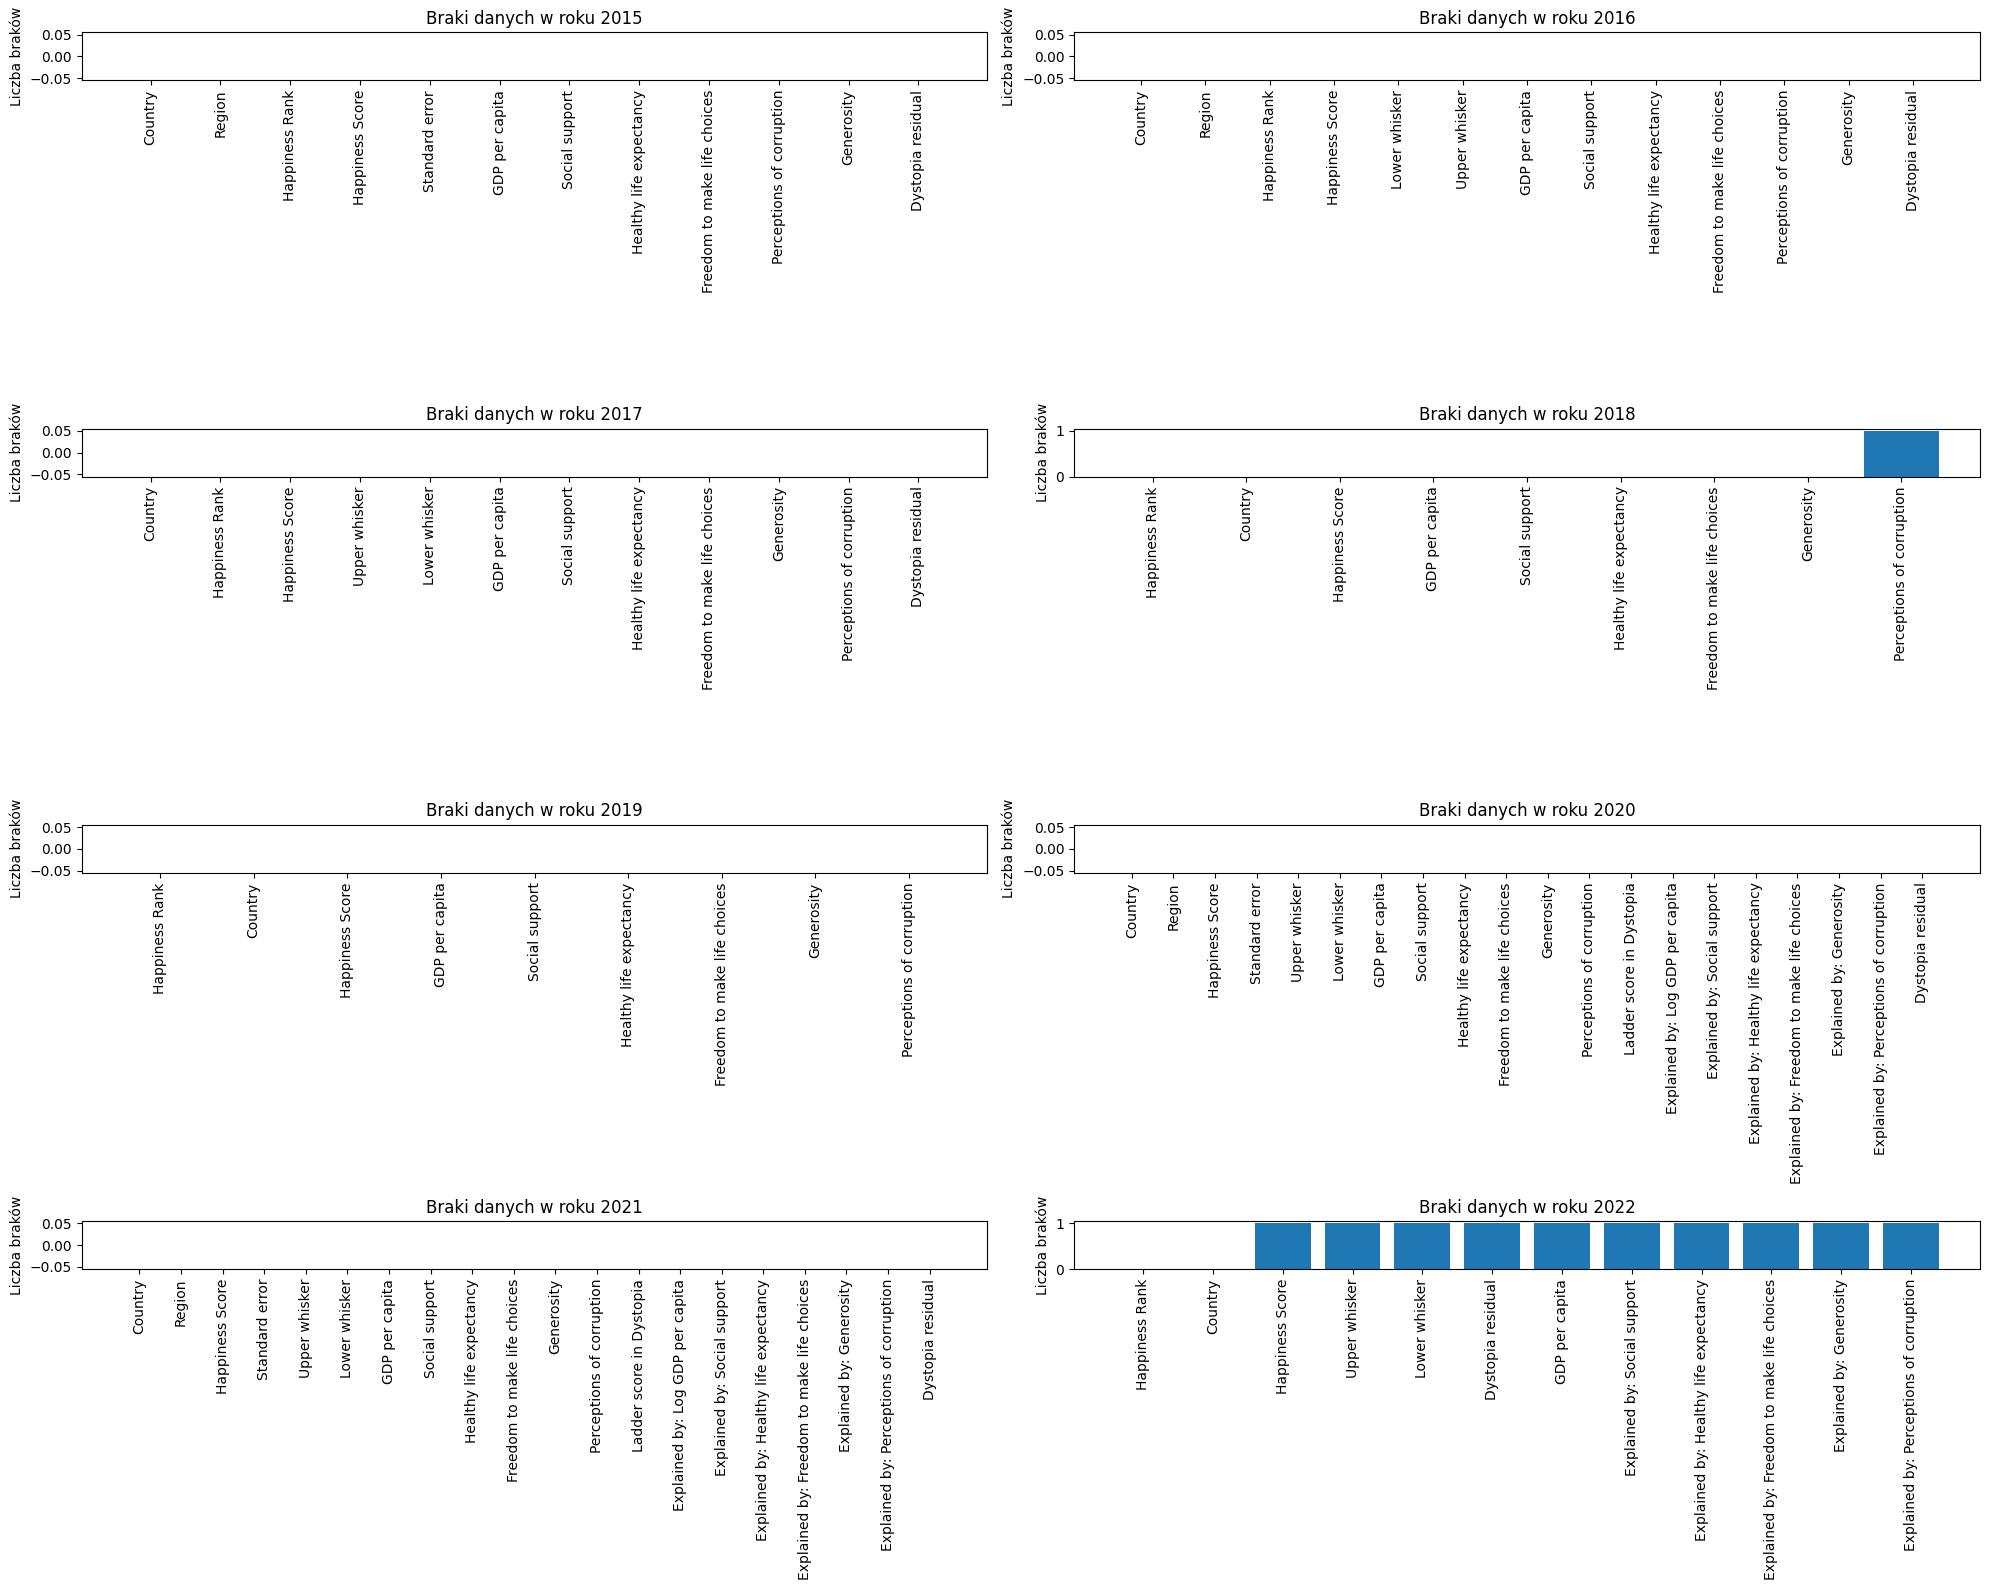

In [8]:
mapa_kolumn = {
    # Kraje i regiony
    'Country or region': 'Country',
    'Country name': 'Country',
    'Regional indicator': 'Region',

    # Rankingi i oceny
    'Happiness Rank': 'Happiness Rank',
    'Happiness.Rank': 'Happiness Rank',
    'RANK': 'Happiness Rank',
    'Overall rank': 'Happiness Rank',

    'Happiness Score': 'Happiness Score',
    'Happiness.Score': 'Happiness Score',
    'Happiness score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Ladder score': 'Happiness Score',

    # Gospodarka
    'Economy (GDP per Capita)': 'GDP per capita',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'GDP per capita': 'GDP per capita',
    'Logged GDP per capita': 'GDP per capita',
    'Explained by: GDP per capita': 'GDP per capita',
    'Log GDP per capita': 'GDP per capita',

    # Rodzina / wsparcie społeczne
    'Family': 'Social support',
    'Social support': 'Social support',

    # Życie i zdrowie
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Healthy life expectancy': 'Healthy life expectancy',

    # Wolność
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',

    # Korupcja / zaufanie
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Perceptions of corruption': 'Perceptions of corruption',

    # Dystopia
    'Dystopia + residual': 'Dystopia residual',
    'Dystopia.Residual': 'Dystopia residual',
    'Dystopia (1.83) + residual': 'Dystopia residual',
    'Dystopia Residual': 'Dystopia residual',

    # Błędy i przedziały ufności
    'Standard Error': 'Standard error',
    'Standard error of ladder score': 'Standard error',
    'Lower Confidence Interval': 'Lower whisker',
    'Whisker-low': 'Lower whisker',
    'Whisker.low': 'Lower whisker',
    'lowerwhisker': 'Lower whisker',

    'Upper Confidence Interval': 'Upper whisker',
    'Whisker-high': 'Upper whisker',
    'Whisker.high': 'Upper whisker',
    'upperwhisker': 'Upper whisker'
}




# Tworzenie subplotów
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 16))
axes = axes.flatten()

# Iteracja po posortowanych latach
for i, year in enumerate(sorted(dfs.keys())):
    df = dfs[year].rename(columns=mapa_kolumn)  # Ujednolicenie nazw kolumn
    null_counts = df.isnull().sum()

    axes[i].bar(null_counts.index, null_counts.values)
    axes[i].set_title(f'Braki danych w roku {year}')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel("Liczba braków")

plt.tight_layout()
plt.show()



### Albo opisac, z wyszczegolnieniem indeksow, gdzie brakuje wartosci

In [9]:
# Sprawdzanie brakujących wartości w każdym z DataFrame'ów
for name, df in dfs.items():
    # Oblicz sumę brakujących wartości dla każdej kolumny
    missing_values = df.isnull().sum()

    # Sprawdź, czy w ogóle istnieją jakieś brakujące wartości
    if missing_values.any():
        print(f"\nDataFrame '{name}' ma brakujące wartości w kolumnach:")
        # Wyświetl tylko te kolumny, w których brakuje danych
        print(missing_values[missing_values > 0])

        # Wyświetl indeksy brakujących wartości dla każdej takiej kolumny
        for col in missing_values[missing_values > 0].index:
            missing_indices = df[df[col].isnull()].index.tolist()
            print(f" → Kolumna '{col}': brakujące wartości w indeksach: {missing_indices}")

        print("-" * 60)  # Separator dla lepszej czytelności
    else:
        print(f"{name} nie ma brakujących wartości.")

print("\n--- Zakończono sprawdzanie brakujących wartości ---")

2015 nie ma brakujących wartości.
2016 nie ma brakujących wartości.
2017 nie ma brakujących wartości.

DataFrame '2018' ma brakujące wartości w kolumnach:
Perceptions of corruption    1
dtype: int64
 → Kolumna 'Perceptions of corruption': brakujące wartości w indeksach: [19]
------------------------------------------------------------
2019 nie ma brakujących wartości.
2020 nie ma brakujących wartości.
2021 nie ma brakujących wartości.

DataFrame '2022' ma brakujące wartości w kolumnach:
Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64
 → Kolumna 'Hap

Zagladamy do ramki 2018. Tu brakuje danych o perception of corruption.

1. Średnia dla regionu	Użyj średniej Corruption dla krajów z tego samego regionu (np. Middle East and North Africa)	✅ Kontekst lokalny, 🟡 uśrednione
2. Średnia dla UAE z innych lat	Jeśli UAE występuje w innych latach, użyj ich średniej	✅ Wiarygodne, 🟡 tylko jeśli dane dostępne
3. Model regresji	Oszacuj wartość na podstawie innych zmiennych (GDP, Score, Support itd.)	✅ Dokładne, 🟡 bardziej złożone


Do tej brakujacej wartosci wrocimy po czyszczeniu danych

In [10]:
dfs[2018].head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


Zagladamy do ramki z 2022 roku. Widzimy, ze w indeksie 146 jest pusta obserwacja, ktora mozna po prostu usunac

In [11]:
dfs[2022]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


In [12]:
# Usuwanie linijki z indeksu 146

dfs[2022].drop(index=146, inplace=True)

In [13]:
dfs[2021]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205



## Ujednolicenia nazw kolumn

In [14]:
# Krok 1: Zbieramy wszystkie unikalne nazwy kolumn z każdego DataFrame
all_columns = set()
for df in dfs.values():
    all_columns.update(df.columns)

# Przekształcamy na posortowaną listę dla przejrzystości
sorted_all_columns = sorted(all_columns)
sorted_all_columns



['Country',
 'Country name',
 'Country or region',
 'Dystopia (1.83) + residual',
 'Dystopia + residual',
 'Dystopia Residual',
 'Dystopia.Residual',
 'Economy (GDP per Capita)',
 'Economy..GDP.per.Capita.',
 'Explained by: Freedom to make life choices',
 'Explained by: GDP per capita',
 'Explained by: Generosity',
 'Explained by: Healthy life expectancy',
 'Explained by: Log GDP per capita',
 'Explained by: Perceptions of corruption',
 'Explained by: Social support',
 'Family',
 'Freedom',
 'Freedom to make life choices',
 'GDP per capita',
 'Generosity',
 'Happiness Rank',
 'Happiness Score',
 'Happiness score',
 'Happiness.Rank',
 'Happiness.Score',
 'Health (Life Expectancy)',
 'Health..Life.Expectancy.',
 'Healthy life expectancy',
 'Ladder score',
 'Ladder score in Dystopia',
 'Logged GDP per capita',
 'Lower Confidence Interval',
 'Overall rank',
 'Perceptions of corruption',
 'RANK',
 'Region',
 'Regional indicator',
 'Score',
 'Social support',
 'Standard Error',
 'Standard er

In [15]:
# Krok 2: Mapa ujednoliconych nazw kolumn
mapa_kolumn = {
    # Kraje i regiony
    'Country or region': 'Country',
    'Country name': 'Country',
    'Regional indicator': 'Region',

    # Rankingi i oceny
    'Happiness Rank': 'Happiness Rank',
    'Happiness.Rank': 'Happiness Rank',
    'RANK': 'Happiness Rank',
    'Overall rank': 'Happiness Rank',

    'Happiness Score': 'Happiness Score',
    'Happiness.Score': 'Happiness Score',
    'Happiness score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Ladder score': 'Happiness Score',

    # Gospodarka
    'Economy (GDP per Capita)': 'GDP per capita',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'GDP per capita': 'GDP per capita',
    'Logged GDP per capita': 'GDP per capita',
    'Explained by: GDP per capita': 'GDP per capita',
    'Log GDP per capita': 'GDP per capita',

    # Rodzina / wsparcie społeczne
    'Family': 'Social support',
    'Social support': 'Social support',

    # Życie i zdrowie
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Healthy life expectancy': 'Healthy life expectancy',

    # Wolność
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',

    # Korupcja / zaufanie
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Perceptions of corruption': 'Perceptions of corruption',

    # Dystopia
    'Dystopia + residual': 'Dystopia residual',
    'Dystopia.Residual': 'Dystopia residual',
    'Dystopia (1.83) + residual': 'Dystopia residual',
    'Dystopia Residual': 'Dystopia residual',

    # Błędy i przedziały ufności
    'Standard Error': 'Standard error',
    'Standard error of ladder score': 'Standard error',
    'Lower Confidence Interval': 'Lower whisker',
    'Whisker-low': 'Lower whisker',
    'Whisker.low': 'Lower whisker',
    'lowerwhisker': 'Lower whisker',

    'Upper Confidence Interval': 'Upper whisker',
    'Whisker-high': 'Upper whisker',
    'Whisker.high': 'Upper whisker',
    'upperwhisker': 'Upper whisker'
}




In [117]:
dfs[2015]

,Year,Country,Region,Happiness Rank,Happiness Score,Standard error,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Dystopia residual
0,2015,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2015,Rwanda,Sub-Saharan Africa,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,2015,Benin,Sub-Saharan Africa,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,2015,Syria,Middle East and Northern Africa,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2015,Burundi,Sub-Saharan Africa,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [17]:
# Krok 3: Zastosowanie mapy nazw kolumn do wszystkich DataFrames
for year, df in dfs.items():
    # Zmieniamy tylko te kolumny, które są w mapie
    renamed_cols = {col: mapa_kolumn[col] for col in df.columns if col in mapa_kolumn}
    dfs[year] = df.rename(columns=renamed_cols)

# Sprawdzenie: które standardowe kolumny są dostępne w każdym roku
column_presence = {
    year: sorted([col for col in df.columns if col in mapa_kolumn.values()])
    for year, df in dfs.items()
}

column_presence


{2015: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Perceptions of corruption',
  'Region',
  'Social support',
  'Standard error'],
 2016: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Lower whisker',
  'Perceptions of corruption',
  'Region',
  'Social support',
  'Upper whisker'],
 2017: ['Country',
  'Dystopia residual',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Lower whisker',
  'Perceptions of corruption',
  'Social support',
  'Upper whisker'],
 2018: ['Country',
  'Freedom to make life choices',
  'GDP per capita',
  'Happiness Rank',
  'Happiness Score',
  'Healthy life expectancy',
  'Perceptions of corruption',
  'Social support'],
 2019: ['Country',
  'Freedom t

In [18]:
dfs[2020]

,Country,Region,Happiness Score,Standard error,Upper whisker,Lower whisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [19]:
# Przetwarzanie każdego DataFrame w dfs
for rok, df in dfs.items():
    # 1. Zastosowanie mapy kolumn (ujednolicenie nazw)
    nowe_nazwy = {col: mapa_kolumn[col] for col in df.columns if col in mapa_kolumn}
    df = df.rename(columns=nowe_nazwy)

    # 2. Usunięcie zduplikowanych kolumn (jeśli występują)
    df = df.loc[:, ~df.columns.duplicated()]

    # 3. Usunięcie istniejącej kolumny 'Year', jeśli już jest
    if 'Year' in df.columns:
        df = df.drop(columns='Year')

    # 4. Dodanie kolumny 'Year' na pierwszą pozycję
    df.insert(0, 'Year', rok)

    # 5. Aktualizacja ramki danych w słowniku
    dfs[rok] = df


In [20]:
# Dodajemy kolumne Happiness Rank, jesli jej brakuje
for rok, df in dfs.items():
    if 'Happiness Score' in df.columns:
        # Obliczenie rankingu na podstawie Happines Score
        df['Happiness Rank'] = df['Happiness Score'].rank(ascending=False, method='min')

        # Wstaw kolumnę przed 'Happiness Score'
        kolumny = df.columns.tolist()
        kolumny.remove('Happiness Rank')
        index_score = kolumny.index('Happiness Score')
        kolumny.insert(index_score, 'Happiness Rank')
        df = df[kolumny]

        dfs[rok] = df

# Sprawdzenie dla roku 2021
dfs[2022]


,Year,Country,Happiness Rank,Happiness Score,Upper whisker,Lower whisker,Dystopia residual,GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,2022,Finland,1.0,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2022,Denmark,2.0,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,2022,Iceland,3.0,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,2022,Switzerland,4.0,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,2022,Netherlands,5.0,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2022,Botswana*,142.0,"3,471","3,667","3,275","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
142,2022,Rwanda*,143.0,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,2022,Zimbabwe,144.0,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,2022,Lebanon,145.0,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"


# Ujednolicenie nazw krajow

In [21]:
# Krok 1: Zbieramy unikalne nazwy krajów z każdej ramki danych
kraje_na_rok = {
    rok: set(df["Country"].dropna().unique()) for rok, df in dfs.items() if "Country" in df.columns
}

# Krok 2: Zbiór wszystkich unikalnych nazw krajów
wszystkie_kraje = sorted(set.union(*kraje_na_rok.values()))

# Krok 3: Macierz obecności krajów w poszczególnych latach
macierz_spojnosci_krajow = pd.DataFrame({
    rok: [kraj in kraje for kraj in wszystkie_kraje] for rok, kraje in kraje_na_rok.items()
}, index=wszystkie_kraje)

# Krok 4: Wybierz kraje, które nie występują we wszystkich 8 latach
niespojne_kraje_df = macierz_spojnosci_krajow[macierz_spojnosci_krajow.sum(axis=1) < len(dfs)]


In [22]:
# Krok 1: Usuń gwiazdki z nazw krajów we wszystkich ramkach danych
for rok, df in dfs.items():
    if "Country" in df.columns:
        df["Country"] = df["Country"].str.replace("*", "", regex=False).str.strip()
        dfs[rok] = df

# Krok 2: Zbierz wszystkie unikalne kraje ze wszystkich lat (po usunięciu gwiazdek)
wszystkie_kraje = set()
for df in dfs.values():
    if "Country" in df.columns:
        wszystkie_kraje.update(df["Country"].dropna().unique())

# Posortowany zbiór unikalnych nazw krajów (do ręcznego mapowania)
wszystkie_kraje = sorted(wszystkie_kraje)

# Wyświetlenie jako DataFrame (np. do tworzenia mapy ujednolicającej)
kraje_df = pd.DataFrame({"Oryginalna nazwa": wszystkie_kraje})

In [23]:
kraje_df

,Oryginalna nazwa
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
170,Venezuela
171,Vietnam
172,Yemen
173,Zambia


In [74]:
# Mapa ręczna: ujednolicone oficjalne nazwy krajów
mapa_ujednolicenia_krajow = {
    # Congo warianty
    "Congo": "Republic of the Congo",  # zakładamy, że to Brazzaville
    "Congo (Brazzaville)": "Republic of the Congo",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",


    # Hong Kong
    "Hong Kong S.A.R. of China": "Hong Kong",
    "Hong Kong S.A.R., China": "Hong Kong",

    # Iran
    "Iran (Islamic Republic of)": "Iran",

    # Russia
    "Russia": "Russian Federation",

    # Palestine
    "Palestinian Territories": "Palestine",
    "Palestine": "Palestine",


    # Czech Republic
    "Czechia": "Czech Republic",

    # United States
    "United States": "United States of America",

    # Macedonia
    "North Macedonia": "Macedonia",

    # Taiwan
    "Taiwan Province of China": "Taiwan",

    # Trinidad i Tobago
    "Trinidad & Tobago": "Trinidad and Tobago",

    # Somalia
    "Somaliland region": "Somaliland",
    "Somaliland Region": "Somaliland"
}

# Zastosowanie ujednoliconego słownika do wszystkich ramek
for rok, df in dfs.items():
    if "Country" in df.columns:
        df["Country"] = df["Country"].replace(mapa_ujednolicenia_krajow)
        dfs[rok] = df

# Sprawdzenie na przykładzie 2021
dfs[2022].Country.unique()


array(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
       'Luxembourg', 'Sweden', 'Norway', 'Israel', 'New Zealand',
       'Austria', 'Australia', 'Ireland', 'Germany', 'Canada',
       'United States of America', 'United Kingdom', 'Czech Republic',
       'Belgium', 'France', 'Bahrain', 'Slovenia', 'Costa Rica',
       'United Arab Emirates', 'Saudi Arabia', 'Taiwan', 'Singapore',
       'Romania', 'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta',
       'Lithuania', 'Slovakia', 'Estonia', 'Panama', 'Brazil',
       'Guatemala', 'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile',
       'Nicaragua', 'Mexico', 'Croatia', 'Poland', 'El Salvador',
       'Kuwait', 'Hungary', 'Mauritius', 'Uzbekistan', 'Japan',
       'Honduras', 'Portugal', 'Argentina', 'Greece', 'South Korea',
       'Philippines', 'Thailand', 'Moldova', 'Jamaica', 'Kyrgyzstan',
       'Belarus', 'Colombia', 'Bosnia and Herzegovina', 'Mongolia',
       'Dominican Republic', 'Malaysia', 'Bolivia', 'Chi

In [25]:
# Krok 1: Zbiór wszystkich krajów we wszystkich ramkach
zbiory_krajow = {rok: set(df["Country"].dropna().unique()) for rok, df in dfs.items()}

# Krok 2: Kraje obecne we wszystkich latach (przecięcie)
kraje_we_wszystkich_latach = set.intersection(*zbiory_krajow.values())

# Krok 3: Lista krajów w jakimkolwiek roku (suma zbiorów)
wszystkie_kraje = set.union(*zbiory_krajow.values())

# Krok 4: Kraje nieobecne w co najmniej jednym roku
kraje_niekompletne = sorted(wszystkie_kraje - kraje_we_wszystkich_latach)

# Tabela krajów obecnych we wszystkich latach
df_kraje_wszystkie = pd.DataFrame(sorted(kraje_we_wszystkich_latach), columns=["Kraje obecne we wszystkich latach"])

# Tabela krajów niekompletnych
df_kraje_brakujace = pd.DataFrame(kraje_niekompletne, columns=["Kraje brakujące w co najmniej jednym roku"])



In [75]:
df_kraje_wszystkie


,Kraje obecne we wszystkich latach
0,Afghanistan
1,Albania
2,Algeria
3,Argentina
4,Armenia
...,...
133,Venezuela
134,Vietnam
135,Yemen
136,Zambia


In [26]:
# Stwórz ramkę, która pokazuje obecność każdego kraju w poszczególnych latach
kraje_unikalne = sorted(set.union(*[set(df["Country"].dropna().unique()) for df in dfs.values()]))

# Tworzymy macierz obecności (kraj x rok)
spojnosc_krajow_df = pd.DataFrame(index=kraje_unikalne, columns=dfs.keys())

# Wypełniamy True/False w zależności od obecności kraju w danym roku
for rok, df in dfs.items():
    obecne_kraje = set(df["Country"].dropna().unique())
    spojnosc_krajow_df[rok] = spojnosc_krajow_df.index.isin(obecne_kraje)

# Które kraje występują tylko w jednym roku
kraje_tylko_w_jednym_roku = spojnosc_krajow_df.sum(axis=1)
kraje_tylko_w_jednym_roku = kraje_tylko_w_jednym_roku[kraje_tylko_w_jednym_roku == 1].index.tolist()

# Przekształć do dłuższego formatu, aby wskazać brakujące kraje per rok
braki = spojnosc_krajow_df[~spojnosc_krajow_df].stack().reset_index()
braki.columns = ["Country", "Year", "Brakuje"]

kraje_tylko_w_jednym_roku


['Djibouti', 'Eswatini, Kingdom of', 'Oman', 'Puerto Rico']

In [79]:
spojnosc_krajow_df.loc[['Djibouti', 'Eswatini, Kingdom of', 'Oman', 'Puerto Rico']]

,2015,2016,2017,2018,2019,2020,2021,2022
Djibouti,True,False,False,False,False,False,False,False
"Eswatini, Kingdom of",False,False,False,False,False,False,False,True
Oman,True,False,False,False,False,False,False,False
Puerto Rico,False,True,False,False,False,False,False,False


In [27]:
# Filtruj dane: tylko kraje, które występują we wszystkich latach
kraje_stale = spojnosc_krajow_df.index[spojnosc_krajow_df.all(axis=1)].tolist()

# Tworzymy nowe ramki danych tylko z tymi krajami
dfs_stale = {}
for rok, df in dfs.items():
    dfs_stale[rok] = df[df["Country"].isin(kraje_stale)].copy()

# Sprawdzenie liczby krajów w każdej nowej ramce
licznik_krajow_stalych = {rok: len(df) for rok, df in dfs_stale.items()}
licznik_krajow_stalych

{2015: 138,
 2016: 138,
 2017: 138,
 2018: 138,
 2019: 138,
 2020: 138,
 2021: 138,
 2022: 138}

In [28]:
# Na podstawie danych z df `spojnosc_krajow_df`, policz ile lat brakuje każdemu krajowi
liczba_brakow = spojnosc_krajow_df.apply(lambda row: (~row).sum(), axis=1)

# Kraje, które mają dokładnie 1 brakujący rok
kraje_z_1_brakiem = liczba_brakow[liczba_brakow == 1].index.tolist()

# W których konkretnie latach brakuje tych krajów
braki_dla_krajow_1 = braki[braki["Country"].isin(kraje_z_1_brakiem)].sort_values(by=["Country", "Year"])


In [82]:
liczba_brakow[liczba_brakow == 1]

,0
Burundi,1
Haiti,1
Laos,1
Lesotho,1
Mozambique,1
Namibia,1


In [30]:
# Połącz listę krajów stałych (pełne dane) i tych z tylko jednym brakującym rokiem
kraje_do_analizy = sorted(set(kraje_stale).union(set(kraje_z_1_brakiem)))

# Stwórz ramkę z ostateczną listą krajów do analizy
df_kraje_do_analizy = pd.DataFrame(kraje_do_analizy, columns=["Kraje do analizy"])


In [72]:
# Filtrowanie danych z dfs tylko dla tych krajów
dfs_kraje_z_1_brakiem = {
    rok: df[df["Country"].isin(kraje_z_1_brakiem)].copy()
    for rok, df in dfs.items()
}

# Łączenie wszystkich lat w jeden DataFrame dla tych krajów
df_kraje_z_1_brakiem = pd.concat(dfs_kraje_z_1_brakiem.values(), ignore_index=True)


In [73]:
dfs_kraje_z_1_brakiem

{2015:      Year     Country                       Region  Happiness Rank  \
 93   2015  Mozambique           Sub-Saharan Africa            94.0   
 96   2015     Lesotho           Sub-Saharan Africa            97.0   
 98   2015        Laos            Southeastern Asia            99.0   
 118  2015       Haiti  Latin America and Caribbean           119.0   
 156  2015     Burundi           Sub-Saharan Africa           157.0   
 
      Happiness Score  Standard error  GDP per capita  Social support  \
 93             4.971         0.07896         0.08308         1.02626   
 96             4.898         0.09438         0.37545         1.04103   
 98             4.876         0.06698         0.59066         0.73803   
 118            4.518         0.07331         0.26673         0.74302   
 156            2.905         0.08658         0.01530         0.41587   
 
      Healthy life expectancy  Freedom to make life choices  \
 93                   0.09131                       0.34037   


,Kraje do analizy
0,Afghanistan
1,Albania
2,Algeria
3,Argentina
4,Armenia
5,Australia
6,Austria
7,Azerbaijan
8,Bahrain
9,Bangladesh


In [32]:
dfs[2016]

,Year,Country,Region,Happiness Rank,Happiness Score,Lower whisker,Upper whisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Dystopia residual
0,2016,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,2016,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,2016,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,2016,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,2016,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2016,Benin,Sub-Saharan Africa,153.0,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,2016,Afghanistan,Southern Asia,154.0,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,2016,Togo,Sub-Saharan Africa,155.0,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,2016,Syria,Middle East and Northern Africa,156.0,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [33]:
# Nowa lista docelowych kolumn we właściwej kolejności
kolumny_docelowe_finalne = [
    "Year", "Country", "Happiness Rank", "Happiness Score",
    "GDP per capita", "Social support", "Healthy life expectancy",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption"
]

# Odbudowa danych z uwzględnieniem unikalnych kolumn i poprawnej kolejności
finalne_dane = []
for rok, df in dfs.items():
    df_filtr = df[df["Country"].isin(kraje_do_analizy)].copy()
    df_filtr["Year"] = rok
    df_filtr = df_filtr[[col for col in kolumny_docelowe_finalne if col in df_filtr.columns]]
    finalne_dane.append(df_filtr)

# Konkatenuj i ustaw kolejność kolumn
df_final = pd.concat(finalne_dane, ignore_index=True)
df_final = df_final[kolumny_docelowe_finalne]

In [34]:
df_final

,Year,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2015,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2015,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,2015,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,2015,Norway,4.0,7.522,1.459,1.33095,0.88521,0.66973,0.34699,0.36503
4,2015,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...
1141,2022,Botswana,142.0,"3,471","1,503",NaN,NaN,NaN,NaN,NaN
1142,2022,Rwanda,143.0,"3,268","0,785",NaN,NaN,NaN,NaN,NaN
1143,2022,Zimbabwe,144.0,"2,995","0,947",NaN,NaN,NaN,NaN,NaN
1144,2022,Lebanon,145.0,"2,955","1,392",NaN,NaN,NaN,NaN,NaN


In [35]:
dfs[2022]

,Year,Country,Happiness Rank,Happiness Score,Upper whisker,Lower whisker,Dystopia residual,GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,2022,Finland,1.0,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2022,Denmark,2.0,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,2022,Iceland,3.0,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,2022,Switzerland,4.0,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,2022,Netherlands,5.0,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2022,Botswana,142.0,"3,471","3,667","3,275","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
142,2022,Rwanda,143.0,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,2022,Zimbabwe,144.0,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,2022,Lebanon,145.0,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"


In [36]:
region_map = dfs[2021][["Country", "Region"]].drop_duplicates()
region_map.columns = ["Country", "Region"]  # standaryzacja nazw kolumn


# Dodaj kolumnę 'Region' przez merge
df_final = pd.merge(df_final, region_map, on="Country", how="left")

# Umieść kolumnę 'Region' bezpośrednio po 'Country'
cols = df_final.columns.tolist()
cols.remove("Region")
insert_pos = cols.index("Country") + 1
cols.insert(insert_pos, "Region")
df_final = df_final[cols]


In [37]:
# Zlokalizuj wartości niebędące liczbami typu float w dwóch kluczowych kolumnach
problematic_cols = ["Happiness Score", "GDP per capita"]

# Znajdź niepoprawne wartości (np. zawierające przecinek)
for col in problematic_cols:
    print(f"\nNiepoprawne wartości w kolumnie '{col}':")
    print(df_final[df_final[col].apply(lambda x: isinstance(x, str) and "," in x)][[col]].head())

# Konwersja: zamiana kropek na przecinki i konwersja na float
for col in problematic_cols:
    df_final[col] = df_final[col].apply(
        lambda x: float(x.replace(",", ".")) if isinstance(x, str) and "," in x else x
    )


Niepoprawne wartości w kolumnie 'Happiness Score':
     Happiness Score
1004           7,821
1005           7,636
1006           7,557
1007           7,512
1008           7,415

Niepoprawne wartości w kolumnie 'GDP per capita':
     GDP per capita
1004          1,892
1005          1,953
1006          1,936
1007          2,026
1008          1,945


Poniewaz rok 2022 nie posiada cech, ktore opisaja indeks szczescia, nie bedziemy go brac w tym momencie pod uwage. Dlatego bedziemy analizowac wylacznie

In [38]:
df_final_no2022 = df_final[df_final["Year"] != 2022].copy()

In [39]:
df_final_no2022["Country"].nunique()

144

Wracamy teraz do naszego braku w Perceptions of corruption w Zjednoczonych Emiratach Arabskich.

In [40]:
# Znalezienie wiersza z brakiem w "Perceptions of corruption"
missing_row = df_final_no2022[df_final_no2022["Perceptions of corruption"].isnull()]

In [41]:
missing_row

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
447,2018,United Arab Emirates,Middle East and North Africa,20.0,6.774,2.096,0.776,0.67,0.284,0.186,NaN


Dla jednej obserwacji wykonamy imputacje danej poprzes srednia z danego regionu.

In [42]:
# Pobranie regionu dla brakującego wiersza
region_missing = missing_row["Region"].values[0]

# Obliczenie średniej z regionu (bez braków)
regional_mean = df_final_no2022[
    (df_final_no2022["Region"] == region_missing) &
    (df_final_no2022["Perceptions of corruption"].notnull())
]["Perceptions of corruption"].mean()

# Zaokrąglenie do 3 miejsc po przecinku
regional_mean = round(regional_mean, 3)

# Imputacja
df_final_no2022.loc[df_final_no2022["Perceptions of corruption"].isnull(), "Perceptions of corruption"] = regional_mean

# Sprawdzenie, czy brak został uzupełniony
missing_after = df_final_no2022["Perceptions of corruption"].isnull().sum()

In [43]:
missing_after

np.int64(0)

In [44]:
df_final_no2022

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2015,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2015,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,2015,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,2015,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,2015,Canada,North America and ANZ,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...,...,...
999,2021,Lesotho,Sub-Saharan Africa,145.0,3.512,7.92600,0.78700,48.70000,0.71500,-0.13100,0.91500
1000,2021,Botswana,Sub-Saharan Africa,146.0,3.467,9.78200,0.78400,59.26900,0.82400,-0.24600,0.80100
1001,2021,Rwanda,Sub-Saharan Africa,147.0,3.415,7.67600,0.55200,61.40000,0.89700,0.06100,0.16700
1002,2021,Zimbabwe,Sub-Saharan Africa,148.0,3.145,7.94300,0.75000,56.20100,0.67700,-0.04700,0.82100


In [45]:
# Lista cech do analizy
cechy = [
    "Happiness Score",
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]

# Tworzenie jednej ramki z obserwacjami odstającymi
outliers_all = pd.DataFrame()

for cecha in cechy:
    Q1 = df_final_no2022[cecha].quantile(0.25)
    Q3 = df_final_no2022[cecha].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    temp_outliers = df_final_no2022[
        (df_final_no2022[cecha] < lower) | (df_final_no2022[cecha] > upper)
    ].copy()
    temp_outliers["Cecha"] = cecha
    outliers_all = pd.concat([outliers_all, temp_outliers], axis=0)




In [46]:
outliers_all.Country.unique()

array(['Togo', 'Benin', 'Afghanistan', 'Thailand', 'Myanmar', 'Malta',
       'Indonesia', 'Czech Republic', 'Japan', 'Greece', 'Azerbaijan',
       'Morocco', 'Georgia', 'Botswana', 'Portugal'], dtype=object)

## Wizualizacje

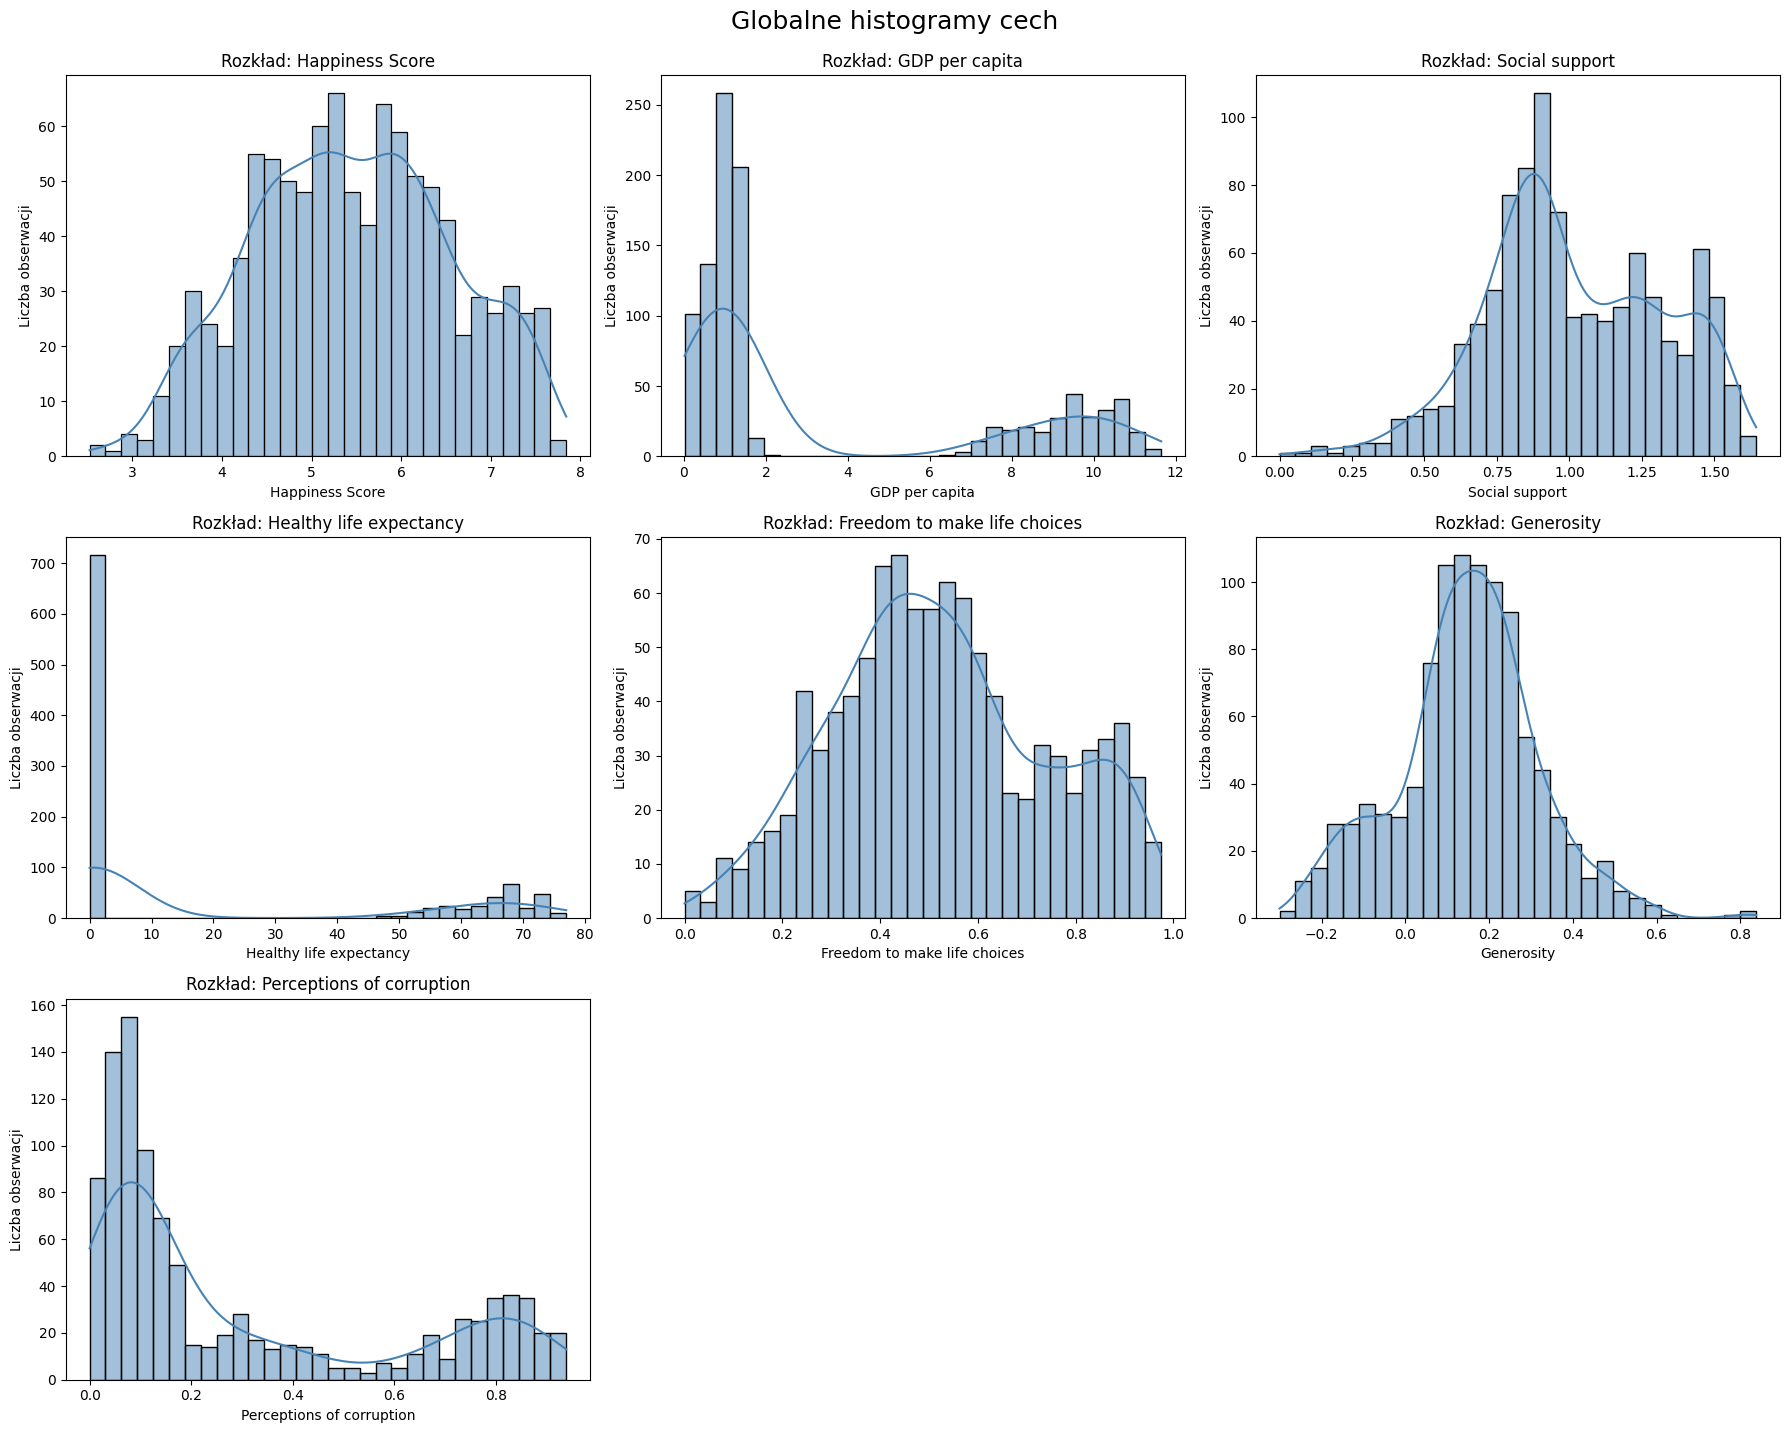

In [115]:
# Tworzenie histogramów dla każdej cechy
plt.figure(figsize=(18, 14))

for i, cecha in enumerate(cechy, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_final_no2022[cecha], kde=True, bins=30, color="steelblue")
    plt.title(f"Rozkład: {cecha}")
    plt.xlabel(cecha)
    plt.ylabel("Liczba obserwacji")
    plt.tight_layout()

plt.suptitle("Globalne histogramy cech", fontsize=18, y=1.02)
plt.show()


📈 1. Happiness Score
Rozkład: Lekko lewoskośny

Opis: Większość krajów ma wyniki w zakresie 4–6, niewiele krajów jest ekstremalnie szczęśliwych (powyżej 7) lub bardzo nieszczęśliwych (poniżej 3).

Wnioski: Dane są stosunkowo równomiernie rozłożone ze skłonnością do środka.

💰 2. GDP per capita
Rozkład: Wyraźnie prawoskośny

Opis: Większość krajów ma niski dochód na osobę, a tylko kilka ma bardzo wysokie wartości (np. Luksemburg, Norwegia).

Wnioski: Transformacja logarytmiczna może być pomocna, np. w regresji.

👨‍👩‍👧 3. Social support
Rozkład: Dość symetryczny, lekko lewoskośny

Opis: Większość wartości oscyluje w granicach 0.7–0.9, ale są wyjątki z bardzo niskim wsparciem społecznym (Afghanistan, Togo).

Wnioski: Dobrze zdefiniowana cecha z kilkoma ekstremami.

🏥 4. Healthy life expectancy
Rozkład: Symetryczny, przypomina rozkład normalny

Opis: Dane skupione wokół 0.55–0.8, co sugeruje względnie spójną sytuację zdrowotną.

Wnioski: Dobre właściwości statystyczne do analizy regresyjnej.

🗽 5. Freedom to make life choices
Rozkład: Lekko prawoskośny

Opis: Większość krajów ma umiarkowaną wolność, ale kilka krajów (zwłaszcza skandynawskich) ma bardzo wysokie wartości.

Wnioski: Może być powiązany z kulturą polityczną i poziomem demokracji.

💝 6. Generosity
Rozkład: Silnie prawoskośny

Opis: Większość krajów ma wartości bliskie 0 lub nawet ujemne, a tylko kilka ma bardzo wysoką hojność (np. Myanmar, Tajlandia).

Wnioski: Ta cecha jest bardzo nierównomierna, trudna do modelowania — może wymagać transformacji lub innego podejścia.

⚖️ 7. Perceptions of corruption
Rozkład: Silnie prawoskośny

Opis: Większość krajów ocenia korupcję jako wysoką (niskie wartości), tylko nieliczne uznawane są za transparentne (wysokie wartości).

Wnioski: Silna asymetria, co może wpływać na analizę korelacyjną i regresję.

In [90]:
# Filtruje wiersze, które mają co najmniej jedno zero (dla kolumn liczbowych)
wiersze_z_zerem = df_final_no2022[(df_final_no2022.select_dtypes(include='number') == 0).any(axis=1)]



In [118]:
wiersze_z_zerem

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
68,2015,Indonesia,Southeast Asia,74.0,5.399,0.828270,1.087080,0.637930,0.466110,0.515350,0.000000
93,2015,Greece,Western Europe,102.0,4.857,1.154060,0.929330,0.882130,0.076990,0.000000,0.013970
103,2015,Iraq,Middle East and North Africa,112.0,4.677,0.985490,0.818890,0.602370,0.000000,0.179220,0.137880
112,2015,Sierra Leone,Sub-Saharan Africa,123.0,4.507,0.330240,0.955710,0.000000,0.408400,0.214880,0.087860
221,2016,Bosnia and Herzegovina,Central and Eastern Europe,87.0,5.163,0.933830,0.643670,0.707660,0.095110,0.298890,0.000000
232,2016,Greece,Western Europe,99.0,5.033,1.248860,0.754730,0.800290,0.058220,0.000000,0.041270
244,2016,Sierra Leone,Sub-Saharan Africa,111.0,4.635,0.364850,0.628000,0.000000,0.306850,0.238970,0.081960
283,2016,Togo,Sub-Saharan Africa,155.0,3.303,0.281230,0.000000,0.248110,0.346780,0.175170,0.115870
367,2017,Greece,Western Europe,87.0,5.227,1.289487,1.239415,0.810199,0.095731,0.000000,0.043290
370,2017,Bosnia and Herzegovina,Central and Eastern Europe,90.0,5.182,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000


In [110]:
df = df_final_no2022.copy()

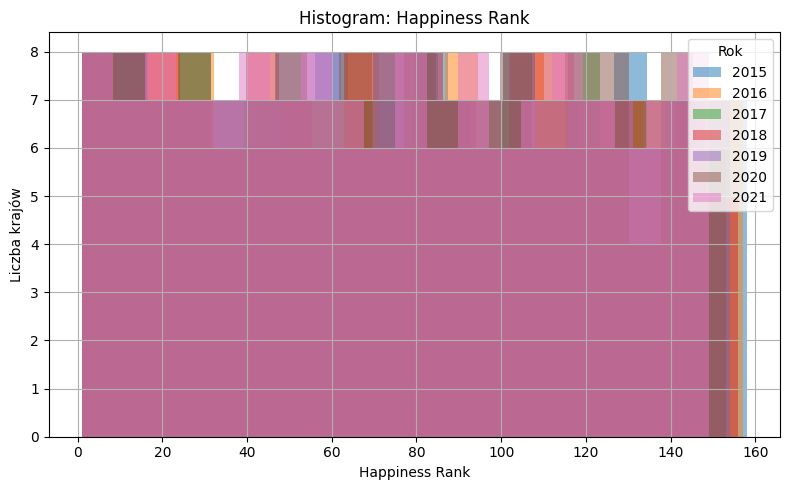

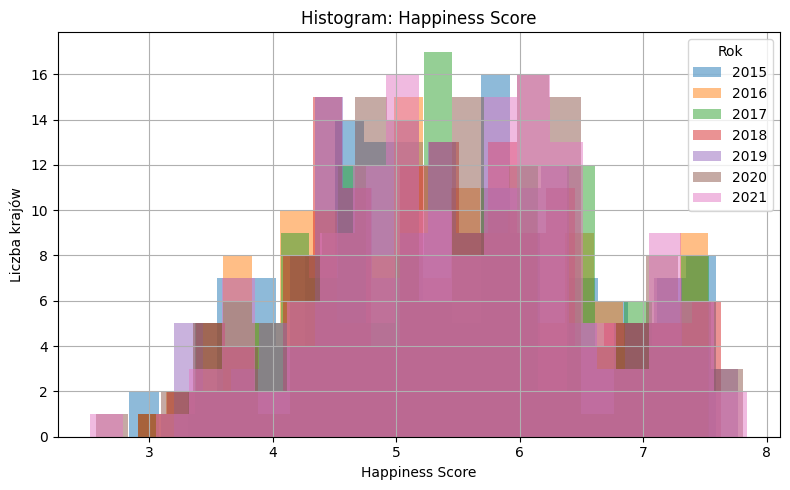

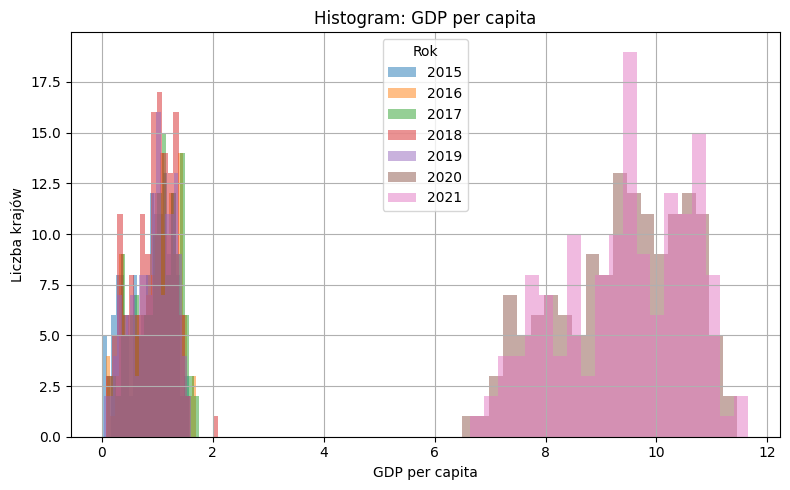

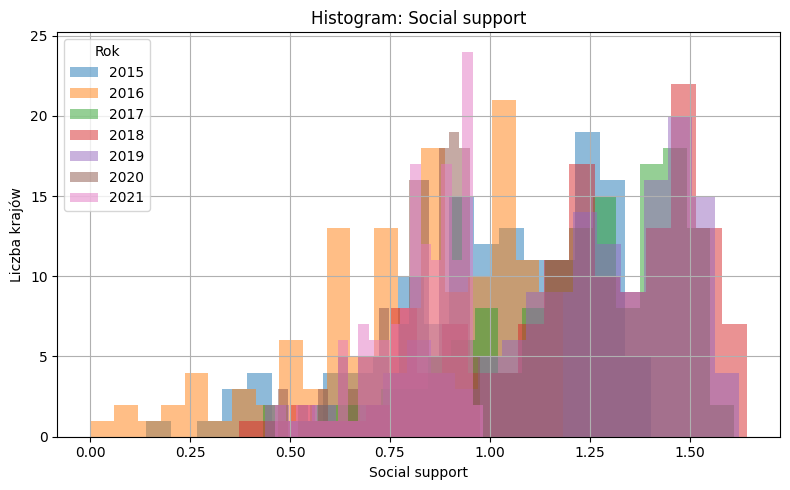

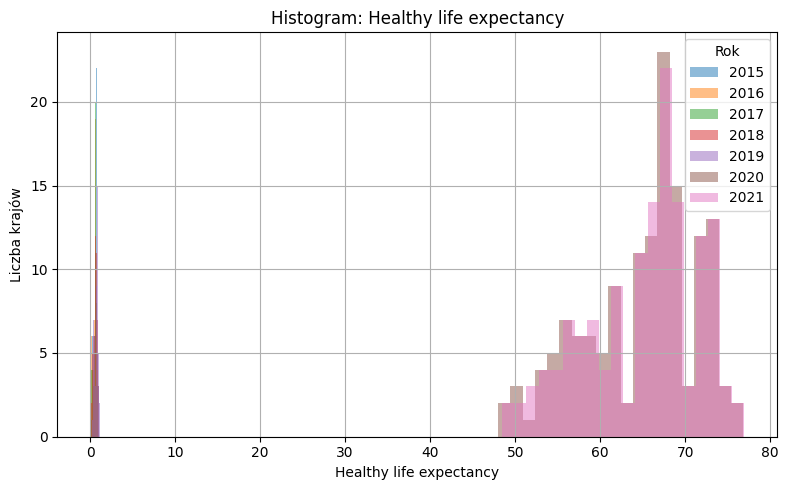

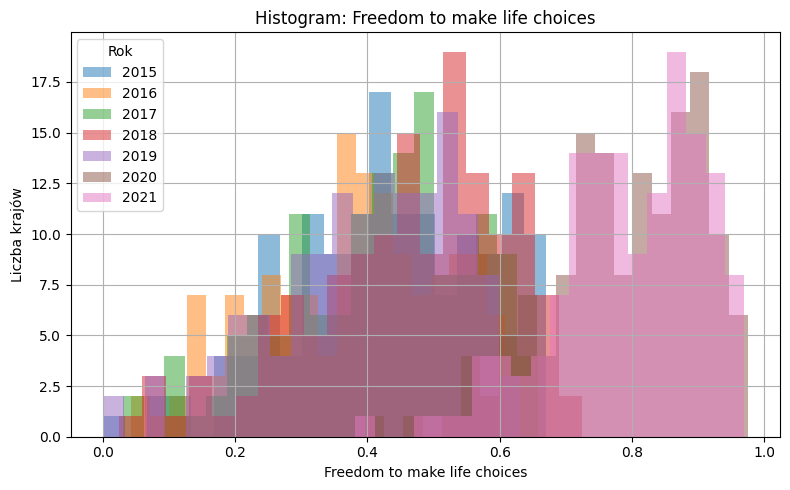

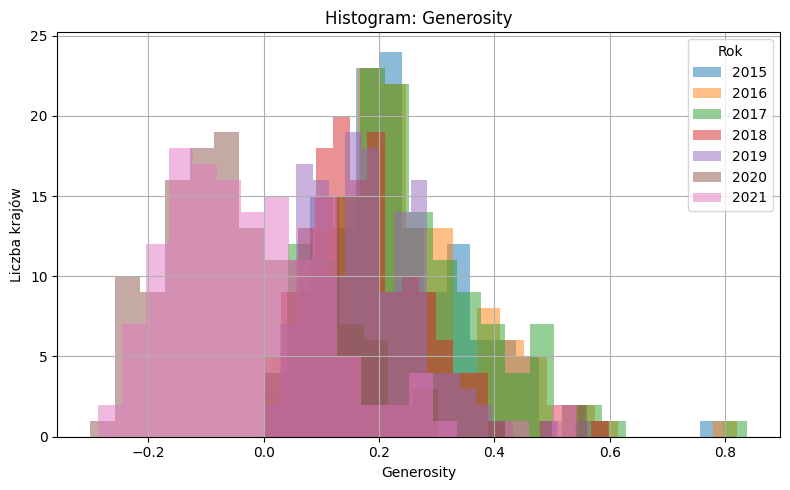

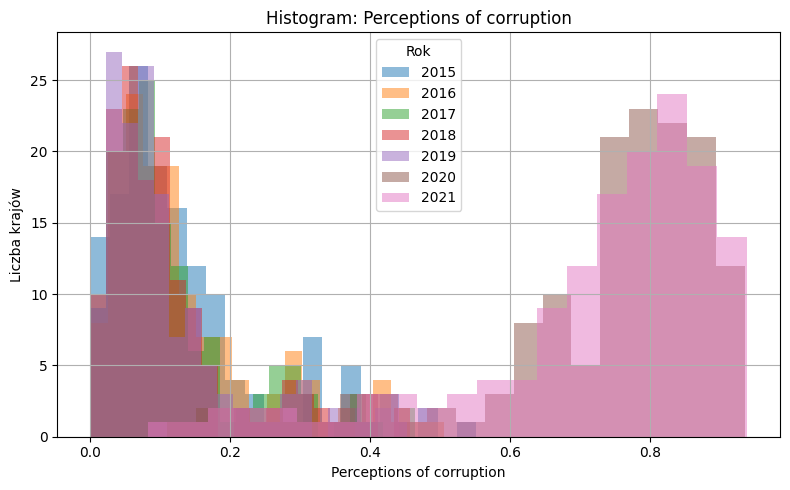

In [111]:
# Lista cech numerycznych (bez Year, Country, Region)
numeric_columns = df.select_dtypes(include='number').columns.tolist()
columns_to_plot = [col for col in numeric_columns if col != 'Year']

# Unikalne lata
years = df['Year'].dropna().unique()
years.sort()

# Tworzenie histogramów dla każdej cechy z podziałem na lata
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    for year in years:
        data = df[df['Year'] == year][column].dropna()
        plt.hist(data, bins=20, alpha=0.5, label=str(int(year)))
    plt.title(f'Histogram: {column}')
    plt.xlabel(column)
    plt.ylabel('Liczba krajów')
    plt.legend(title='Rok')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


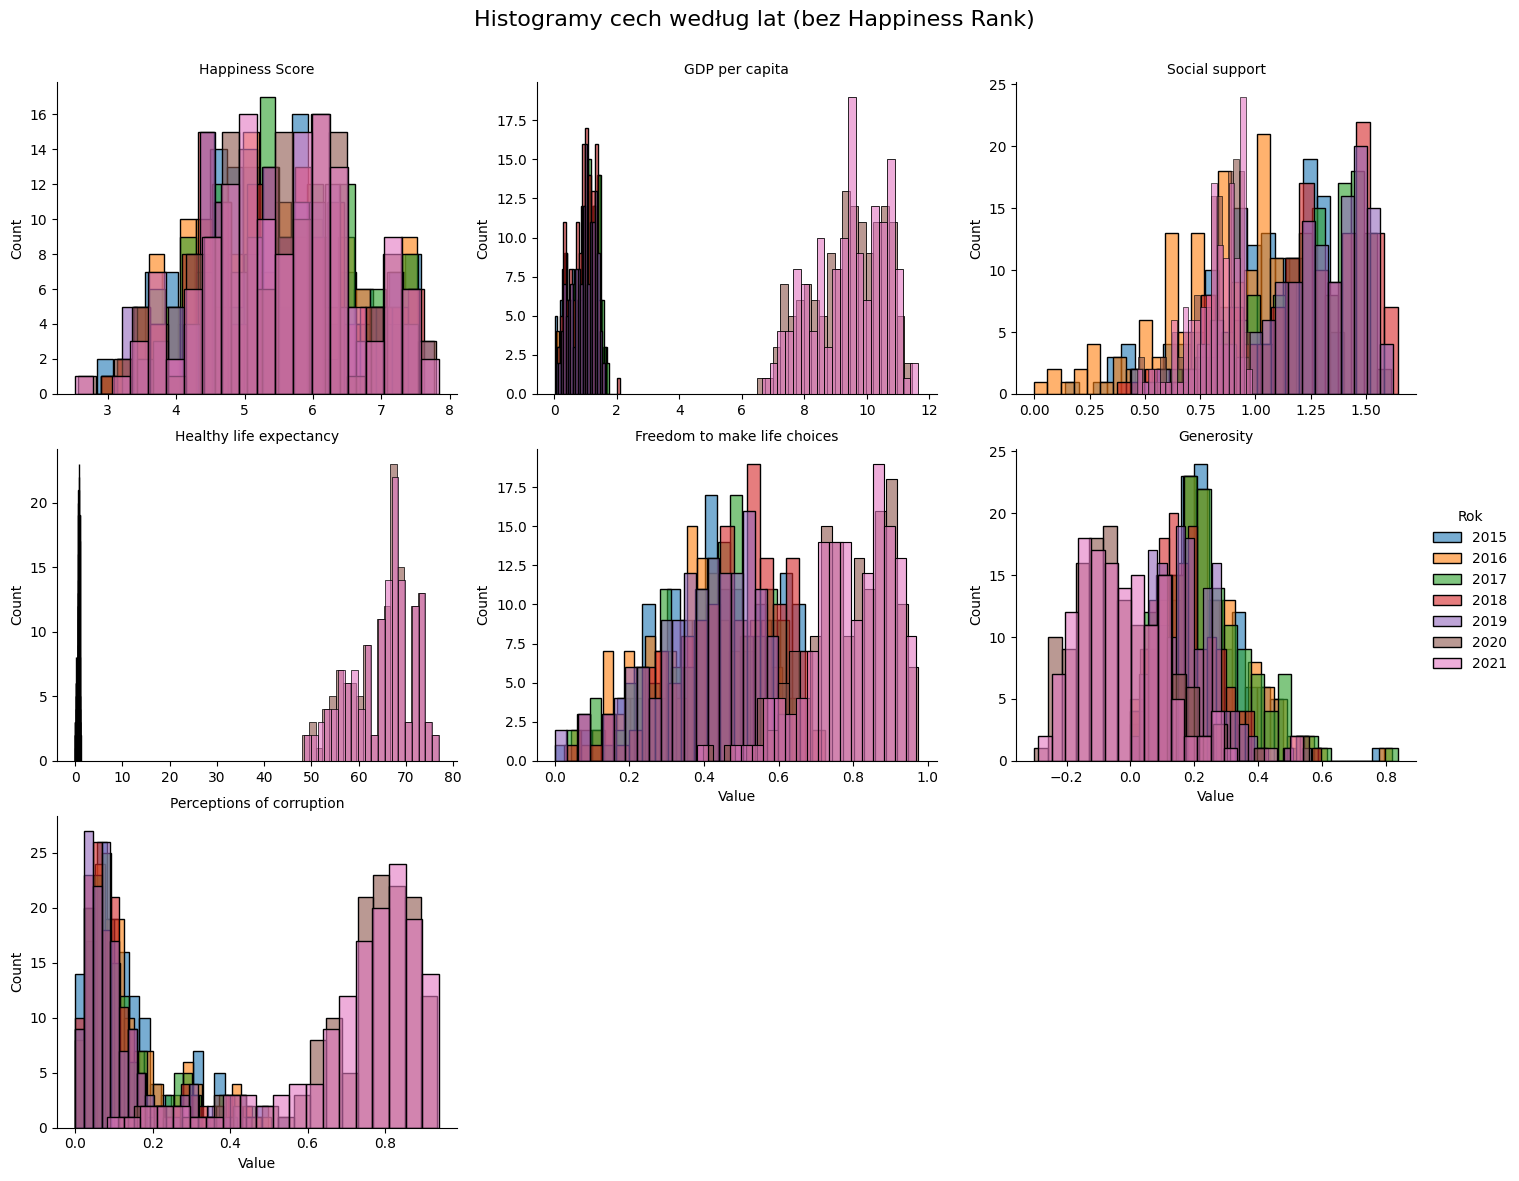

In [114]:
# Usunięcie kolumny 'Happiness Rank' z danych
columns_to_plot_filtered = [col for col in columns_to_plot if col != 'Happiness Rank']

# Przekształcenie danych na długi format bez 'Happiness Rank'
df_long_filtered = df.melt(id_vars=["Year"], value_vars=columns_to_plot_filtered, var_name="Feature", value_name="Value")

# Ponowne tworzenie wykresów typu FacetGrid
g = sns.FacetGrid(df_long_filtered, col="Feature", col_wrap=3, hue="Year", sharex=False, sharey=False, height=4, aspect=1.2)
g.map(sns.histplot, "Value", bins=20, alpha=0.6)
g.add_legend(title="Rok")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Histogramy cech według lat (bez Happiness Rank)", fontsize=16)
plt.show()



In [91]:
wiersze_z_zerem

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
68,2015,Indonesia,Southeast Asia,74.0,5.399,0.828270,1.087080,0.637930,0.466110,0.515350,0.000000
93,2015,Greece,Western Europe,102.0,4.857,1.154060,0.929330,0.882130,0.076990,0.000000,0.013970
103,2015,Iraq,Middle East and North Africa,112.0,4.677,0.985490,0.818890,0.602370,0.000000,0.179220,0.137880
112,2015,Sierra Leone,Sub-Saharan Africa,123.0,4.507,0.330240,0.955710,0.000000,0.408400,0.214880,0.087860
221,2016,Bosnia and Herzegovina,Central and Eastern Europe,87.0,5.163,0.933830,0.643670,0.707660,0.095110,0.298890,0.000000
232,2016,Greece,Western Europe,99.0,5.033,1.248860,0.754730,0.800290,0.058220,0.000000,0.041270
244,2016,Sierra Leone,Sub-Saharan Africa,111.0,4.635,0.364850,0.628000,0.000000,0.306850,0.238970,0.081960
283,2016,Togo,Sub-Saharan Africa,155.0,3.303,0.281230,0.000000,0.248110,0.346780,0.175170,0.115870
367,2017,Greece,Western Europe,87.0,5.227,1.289487,1.239415,0.810199,0.095731,0.000000,0.043290
370,2017,Bosnia and Herzegovina,Central and Eastern Europe,90.0,5.182,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000


In [95]:
df_final_no2022.describe()


,Year,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,2018.007968,76.103586,5.462415,3.362653,1.016399,19.090196,0.524237,0.147727,0.297043
std,2.000483,44.380181,1.105389,3.894827,0.303297,29.339900,0.217991,0.168196,0.303616
min,2015.000000,1.000000,2.523000,0.015300,0.000000,0.000000,0.000000,-0.300907,0.000000
25%,2016.000000,37.000000,4.630250,0.815042,0.813000,0.582855,0.373510,0.058307,0.066682
50%,2018.000000,76.000000,5.431000,1.184020,0.952243,0.790780,0.505683,0.153000,0.135364
75%,2020.000000,114.000000,6.266650,7.844928,1.257588,56.097485,0.671428,0.247251,0.533227
max,2021.000000,158.000000,7.842000,11.647000,1.644000,76.953000,0.974998,0.838075,0.939000


In [107]:
(df_final_no2022 == 0).sum(numeric_only=True)


,0
Year,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
GDP per capita,0
Social support,1
Healthy life expectancy,4
Freedom to make life choices,2
Generosity,5


## Analiza opisowa

- przyjrzenie się krajom, ktore mają najwyższy wskaźnik szczęścia
- przyjrzenie się krajom, ktore mają najniższy wskaźnik szczęścia
- przyjrzenie się krajom, ktore mają największy wzrost wskaźnika szczęścia
- przyjrzenie się krajom, ktore mają największy spadek wskaźnika szczęścia
- czy COVID-19 miał wpływ na wskaźnik szczęścia?

## Wnioski

In [98]:
# Zapisz plik Excel w środowisku Colab
df_final_no2022.to_excel("df_final_no2022.xlsx", index=False)

# Udostępnij plik do pobrania
from google.colab import files
files.download("df_final_no2022.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
rows_with_nan_or_zero = df_final_no2022[df_final_no2022.isnull().any(axis=1) | (df_final_no2022 == 0).any(axis=1)]

In [104]:
rows_with_nan_or_zero

,Year,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
